In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import progressbar
from datetime import datetime
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion, ProteinWeights, CombinedSpectra



['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mjoppich/.local/lib/python3.6/site-packages', '/home/mjoppich/.local/lib/python3.6/site-packages/mpld3-0.3.1.dev1-py3.6.egg', '/home/mjoppich/.local/lib/python3.6/site-packages/opennre-0.1-py3.6.egg', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/tf_unet-0.1.1-py3.6.egg', '/mnt/d/PythonCGI/jupyter_micropython_kernel', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1

In [2]:
! ls /mnt/d/dev/data/msi/AL1_1

200213_AL1_1.ibd    200213_AL1_1.imzML.regions	200213_AL1_1_spotlist.txt
200213_AL1_1.imzML  200213_AL1_1_Plot.jpg


In [3]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/AL1_1/200213_AL1_1.imzML")

Opening regions file for /mnt/d/dev/data/msi/AL1_1/200213_AL1_1.imzML


0 ((4449, 4505, 938, 1002), 3705)
1 ((4490, 4532, 1365, 1415), 2180)
2 ((3542, 3644, 1195, 1262), 7004)
3 ((2409, 2502, 1572, 1633), 5828)
4 ((4559, 4646, 1158, 1250), 8158)
5 ((2317, 2372, 1400, 1490), 5096)
6 ((2317, 2387, 1648, 1702), 3905)


<Figure size 1440x576 with 0 Axes>

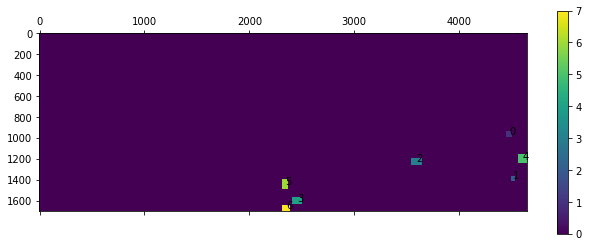

{0: ((4449, 4505, 938, 1002), 3705),
 1: ((4490, 4532, 1365, 1415), 2180),
 2: ((3542, 3644, 1195, 1262), 7004),
 3: ((2409, 2502, 1572, 1633), 5828),
 4: ((4559, 4646, 1158, 1250), 8158),
 5: ((2317, 2372, 1400, 1490), 5096),
 6: ((2317, 2387, 1648, 1702), 3905)}

In [4]:
plt.figure(figsize=(20, 8))
imze.list_regions()

In [5]:
avg_region_spectrum = imze.get_avg_region_spectrum(2)

Found region 2 with shape (103, 68, 38800)
I0702 20:39:07.517187 139892122912576 segment.py:2482] Found region 2 with shape (103, 68, 38800)


In [6]:
spectra_orig = imze.get_region_array(3, makeNullLine=True)

Found region 3 with shape (94, 62, 38800)
I0702 20:39:31.346878 139892122912576 segment.py:2482] Found region 3 with shape (94, 62, 38800)


In [7]:
maxShift = 20

In [9]:
spectra_orig_nobg, spectra_orig_nobg_masses = imze.remove_background_spec_aligned(spectra_orig,avg_region_spectrum, imze.mzValues, 20)
sh_sporig, sh_masses_sporig = imze.shift_region_array(spectra_orig_nobg, spectra_orig_nobg_masses, maxShift)

(38800,)
(94, 62, 38800)


../src/pySRM/pysrm/segment.py:2392: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(vA, vB) / (np.sqrt(np.dot(vA,vA)) * np.sqrt(np.dot(vB,vB)))
100% |########################################################################|


Shifts: mean: 0.059025394646533974, median: 0.0


In [20]:
sh_sporig.shape

(94, 62, 38720)

In [23]:
sh_masses_sporig.shape

(38720,)

In [ ]:
spectra_intra = imze.normalize_region_array(sh_sporig, normalize="intra_median")
sh_sporig_norm = imze.normalize_region_array(spectra_intra, normalize="inter_median")

In [8]:
spectra_orig = imze.get_region_array(3, makeNullLine=True)
sh_sporig_bg, sh_masses_sporig_bg = imze.shift_region_array(spectra_orig, imze.mzValues, maxShift)

Found region 3 with shape (94, 62, 38800)
I0702 20:39:56.102620 139892122912576 segment.py:2482] Found region 3 with shape (94, 62, 38800)
100% |########################################################################|


Shifts: mean: -1.4826698695950584, median: -1.0


In [9]:
spectra_intra = imze.normalize_region_array(sh_sporig_bg, normalize="intra_median")
sh_sporig_bg = imze.normalize_region_array(spectra_intra, normalize="inter_median")

I0702 20:40:27.976888 139892122912576 segment.py:2196] Collecting fold changes
Got a total of 225893280 fold changes
I0702 20:44:32.442464 139892122912576 segment.py:2207] Got a total of 225893280 fold changes
Median elements [112946640]
I0702 20:44:33.325451 139892122912576 segment.py:2216] Median elements [112946640]
Median elements
I0702 20:44:33.726487 139892122912576 segment.py:2229] Median elements
Global Median
I0702 20:44:33.728631 139892122912576 segment.py:2234] Global Median


In [11]:
def plot_coords(arr, coords, valRange, xvals):
    plt.figure(figsize=(20, 6))
        
    for x in coords:
        plt.plot(xvals[valRange], arr[x[0], x[1]][valRange], label=str(x))
    plt.legend()

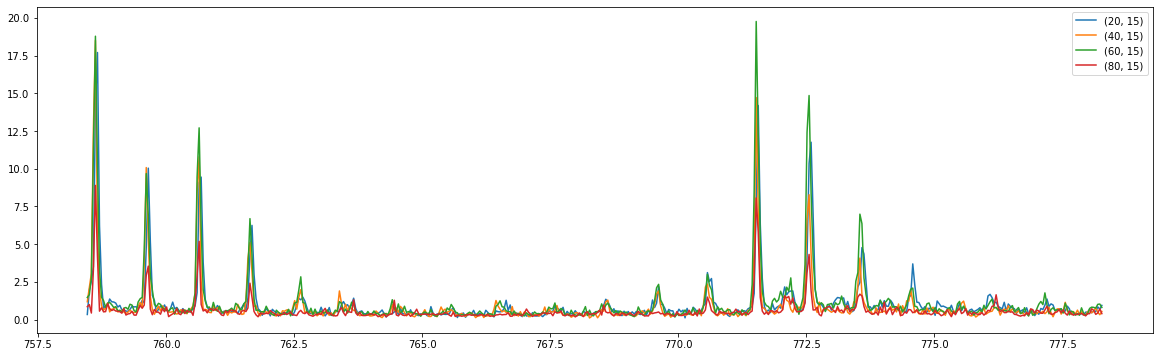

In [12]:
plot_coords(sh_sporig_bg, [(20,15), (40,15), (60,15), (80,15)], range(7500,8000), sh_masses_sporig_bg)

525.3346626529973 1
545.5826252604166 1
575.9148672840802 1
610.6143169289518 2
610.6540188164173 4
628.8374832756292 1
638.6835513670801 1
654.6437101282224 994
654.683412015688 749
657.1449290385508 1
682.4747332415577 1
683.7451936404545 1
692.4399069954053 1
698.6731033274932 3029
698.7128052149587 272
708.3206619816165 1
716.9359715616362 1
718.3652395103952 1
729.7596812130017 1
742.6627946392985 1
742.702496526764 597
742.7421984142295 2
744.8066965624369 1
747.3476173602307 1
758.3847420756475 1
759.8934137993376 1
766.0869082439599 1
770.6923271899612 1
785.7790444268619 1
786.6921878385691 2
786.7318897260346 24
787.1289086006899 1
787.6847350252073 1
788.558176549449 1
790.3844633728631 1
792.8062785082604 1
795.783920068175 4
795.8236219556405 3
796.0221313929683 1
796.6573615924167 1
798.2057352035722 1
805.8284975969536 1
810.7515316426791 1
811.5455693919897 1
819.8035619848196 3
819.8432638722851 1
820.9549167213199 1
826.1558639793041 1
827.8233432528563 1
830.40396593

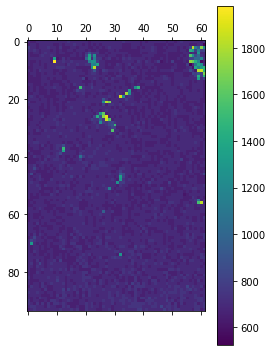

5828 0.5692285308046767 177.31963424379362 73.61706496136573


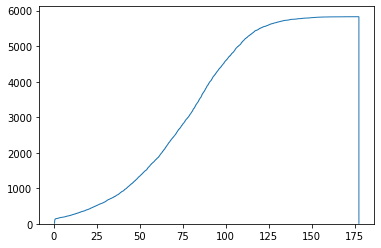

In [14]:
imze.list_highest_peaks(sh_sporig_bg, counter=True)

In [18]:
sh_sporig_norm.shape

(94, 62, 38720)

In [19]:
sh_masses_sporig.shape

(38760,)

In [24]:
spec_sh = SpectraRegion(sh_sporig_norm, sh_masses_sporig)

2020-07-02 20:10:27,590  SpectraRegion  INFO: Processing Mass 780 with best existing mass 779.9825688568949
I0702 20:10:27.590865 140436024657728 segment.py:464] Processing Mass 780 with best existing mass 779.9825688568949


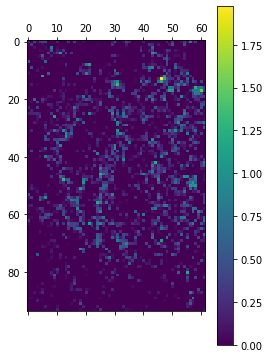

In [31]:
spec_sh.mass_heatmap(780)

2020-07-02 18:47:09,528  SpectraRegion  INFO: Processing Mass 758 with best existing mass 757.9877232009923
I0702 18:47:09.528589 140436024657728 segment.py:464] Processing Mass 758 with best existing mass 757.9877232009923


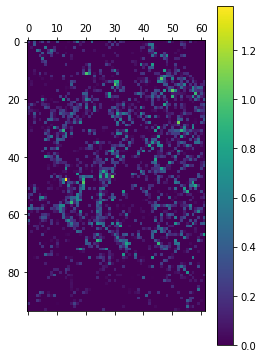

In [26]:
spec_sh.mass_heatmap(758)

In [27]:
spec_sh.calculate_similarity(mode="spectra_log")

(94, 62, 38720)


2020-07-02 18:50:35,922  SpectraRegion  INFO: Creating C++ obj
I0702 18:50:35.922911 140436024657728 segment.py:496] Creating C++ obj
2020-07-02 18:50:35,925  SpectraRegion  INFO: dimensions 38720
I0702 18:50:35.925259 140436024657728 segment.py:506] dimensions 38720
2020-07-02 18:50:35,927  SpectraRegion  INFO: input dimensions (94, 62, 38720)
I0702 18:50:35.927257 140436024657728 segment.py:507] input dimensions (94, 62, 38720)
2020-07-02 18:50:35,932  SpectraRegion  INFO: Switching to dot mode
I0702 18:50:35.932018 140436024657728 segment.py:510] Switching to dot mode
2020-07-02 18:50:35,934  SpectraRegion  INFO: Starting calc similarity c++
I0702 18:50:35.934073 140436024657728 segment.py:514] Starting calc similarity c++


38720


2020-07-02 19:00:05,294  SpectraRegion  INFO: outclust dimensions (5828, 5828)
I0702 19:00:05.294138 140436024657728 segment.py:519] outclust dimensions (5828, 5828)
2020-07-02 19:00:05,394  SpectraRegion  INFO: Calculating spectra similarity
I0702 19:00:05.394072 140436024657728 segment.py:553] Calculating spectra similarity


(5828, 5828)


2020-07-02 19:00:05,672  SpectraRegion  INFO: Calculating spectra similarity done
I0702 19:00:05.672544 140436024657728 segment.py:557] Calculating spectra similarity done


array([[1.        , 0.9270206 , 0.904576  , ..., 0.8999733 , 0.8826736 ,
        0.8854572 ],
       [0.9270206 , 1.        , 0.75227   , ..., 0.9439155 , 0.9509494 ,
        0.89806914],
       [0.904576  , 0.75227   , 1.        , ..., 0.7578632 , 0.71672446,
        0.78490406],
       ...,
       [0.8999733 , 0.9439155 , 0.7578632 , ..., 1.        , 0.9631428 ,
        0.9573478 ],
       [0.8826736 , 0.9509494 , 0.71672446, ..., 0.9631428 , 1.        ,
        0.9433613 ],
       [0.8854572 , 0.89806914, 0.78490406, ..., 0.9573478 , 0.9433613 ,
        1.        ]], dtype=float32)

In [29]:
spec_sh.segment(method="WARD", number_of_regions=15)

2020-07-02 20:10:03,200  SpectraRegion  INFO: Calculating clusters
I0702 20:10:03.200534 140436024657728 segment.py:721] Calculating clusters
2020-07-02 20:10:04,755  SpectraRegion  INFO: Calculating clusters done
I0702 20:10:04.755937 140436024657728 segment.py:736] Calculating clusters done
2020-07-02 20:10:04,797  SpectraRegion  INFO: Calculating clusters saved
I0702 20:10:04.797476 140436024657728 segment.py:754] Calculating clusters saved


array([[ 1,  4,  3, ...,  7,  4,  9],
       [ 7,  1,  4, ...,  9, 15, 11],
       [ 4,  1,  1, ..., 11, 13, 14],
       ...,
       [ 1,  4,  4, ...,  3,  3,  1],
       [ 8,  1,  4, ...,  4,  4,  4],
       [ 8,  8,  4, ...,  4,  4,  4]], dtype=int16)

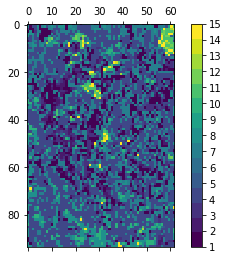

In [30]:
spec_sh.plot_segments()

In [15]:
specbg_sh = SpectraRegion(sh_sporig_bg, sh_masses_sporig_bg)
specbg_sh.calculate_similarity(mode="spectra_log")
specbg_sh.segment(method="WARD", number_of_regions=15)

(94, 62, 38760)


2020-07-02 20:46:29,138  SpectraRegion  INFO: Creating C++ obj
I0702 20:46:29.138267 139892122912576 segment.py:496] Creating C++ obj
2020-07-02 20:46:29,140  SpectraRegion  INFO: dimensions 38760
I0702 20:46:29.140904 139892122912576 segment.py:506] dimensions 38760
2020-07-02 20:46:29,143  SpectraRegion  INFO: input dimensions (94, 62, 38760)
I0702 20:46:29.143347 139892122912576 segment.py:507] input dimensions (94, 62, 38760)
2020-07-02 20:46:29,147  SpectraRegion  INFO: Switching to dot mode
I0702 20:46:29.147779 139892122912576 segment.py:510] Switching to dot mode
2020-07-02 20:46:29,150  SpectraRegion  INFO: Starting calc similarity c++
I0702 20:46:29.150741 139892122912576 segment.py:514] Starting calc similarity c++


38760


2020-07-02 20:58:05,808  SpectraRegion  INFO: outclust dimensions (5828, 5828)
I0702 20:58:05.808272 139892122912576 segment.py:519] outclust dimensions (5828, 5828)
2020-07-02 20:58:05,923  SpectraRegion  INFO: Calculating spectra similarity
I0702 20:58:05.923643 139892122912576 segment.py:553] Calculating spectra similarity


(5828, 5828)


2020-07-02 20:58:06,286  SpectraRegion  INFO: Calculating spectra similarity done
I0702 20:58:06.286572 139892122912576 segment.py:557] Calculating spectra similarity done
2020-07-02 20:58:06,484  SpectraRegion  INFO: Calculating clusters
I0702 20:58:06.484164 139892122912576 segment.py:721] Calculating clusters
2020-07-02 20:58:08,185  SpectraRegion  INFO: Calculating clusters done
I0702 20:58:08.185980 139892122912576 segment.py:736] Calculating clusters done
2020-07-02 20:58:08,230  SpectraRegion  INFO: Calculating clusters saved
I0702 20:58:08.230072 139892122912576 segment.py:754] Calculating clusters saved


array([[10, 10,  3, ...,  3,  3,  2],
       [ 3, 10,  3, ...,  1,  1,  1],
       [14, 10, 10, ...,  1,  1,  1],
       ...,
       [10, 10, 13, ..., 13,  3,  9],
       [11, 11, 10, ...,  9, 13,  9],
       [ 3, 11,  9, ...,  9, 13,  9]], dtype=int16)

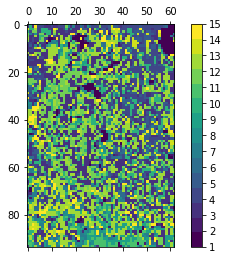

In [16]:
specbg_sh.plot_segments()

In [35]:
sh_masses_sporig_bg.shape

(38720,)

In [36]:
sh_sporig_bg.shape

(94, 62, 38760)

In [194]:
def calc_dot_sim( mat ):
    
    bar = progressbar.ProgressBar()
    
    elems = mat.shape[0]*mat.shape[1]
    
    result = np.zeros((elems, elems))
    mats = np.array(mat, copy=True)
    
    def normalized(a, axis=-1, order=2):
        l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
        l2[l2==0] = 1
        return a / np.expand_dims(l2, axis)
    
    print("Normalizing Matrix Start", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
    mats = normalized(mat,2)
    print("Normalizing Matrix End", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
        
    print("Calculating cosine similarity Start", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
    for i in bar(range(0, mats.shape[0])):
        for j in range(0, mats.shape[1]):
            idxI = i*mats.shape[1] + j
            
            for k in range(0, mats.shape[0]):
                for l in range(0, mat.shape[1]):
                    idxJ = k*mats.shape[1] + l
                    
                    if idxJ == idxI:
                        result[idxI, idxJ] = 1
                        continue
                    
                    if idxJ < idxJ:
                        continue
                        
                    cosSim = np.dot(mats[i,j,:], mats[k,j,:])
                    result[idxI, idxJ] = cosSim
                    result[idxJ, idxJ] = cosSim
                    
    print("Calculating cosine similarity End", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
                    
    return result
            
            

In [195]:
npcos = calc_dot_sim( sh_array )

Normalizing Matrix Start 26/06/2020 11:14:45
Normalizing Matrix End 26/06/2020 11:14:48
Calculating cosine similarity Start 26/06/2020 11:14:48


Calculating cosine similarity End 26/06/2020 11:29:08


100% |########################################################################|


(94, 62, 38680)


2020-07-01 16:07:26,582  SpectraRegion  INFO: Creating C++ obj
I0701 16:07:26.582862 139815256065856 segment.py:496] Creating C++ obj
2020-07-01 16:07:26,585  SpectraRegion  INFO: dimensions 38680
I0701 16:07:26.585140 139815256065856 segment.py:506] dimensions 38680
2020-07-01 16:07:26,586  SpectraRegion  INFO: input dimensions (94, 62, 38680)
I0701 16:07:26.586622 139815256065856 segment.py:507] input dimensions (94, 62, 38680)
2020-07-01 16:07:26,590  SpectraRegion  INFO: Switching to dot mode
I0701 16:07:26.590953 139815256065856 segment.py:510] Switching to dot mode
2020-07-01 16:07:26,593  SpectraRegion  INFO: Starting calc similarity c++
I0701 16:07:26.593828 139815256065856 segment.py:514] Starting calc similarity c++


38680


2020-07-01 16:17:08,455  SpectraRegion  INFO: outclust dimensions (5828, 5828)
I0701 16:17:08.455307 139815256065856 segment.py:519] outclust dimensions (5828, 5828)
2020-07-01 16:17:08,575  SpectraRegion  INFO: Calculating spectra similarity
I0701 16:17:08.575424 139815256065856 segment.py:553] Calculating spectra similarity


(5828, 5828)


2020-07-01 16:17:09,570  SpectraRegion  INFO: Calculating spectra similarity done
I0701 16:17:09.570097 139815256065856 segment.py:557] Calculating spectra similarity done


array([[1.        , 0.8883334 , 0.9175416 , ..., 0.722038  , 0.618763  ,
        0.58209187],
       [0.8883334 , 1.        , 0.9665562 , ..., 0.82182693, 0.6125076 ,
        0.6303529 ],
       [0.9175416 , 0.9665562 , 1.        , ..., 0.7260193 , 0.50251305,
        0.5013615 ],
       ...,
       [0.722038  , 0.82182693, 0.7260193 , ..., 1.        , 0.83999455,
        0.8708154 ],
       [0.618763  , 0.6125076 , 0.50251305, ..., 0.83999455, 1.        ,
        0.96188056],
       [0.58209187, 0.6303529 , 0.5013615 , ..., 0.8708154 , 0.96188056,
        1.        ]], dtype=float32)

In [61]:
spec_sh.segment(method="WARD", number_of_regions=15)

2020-07-01 16:35:48,000  SpectraRegion  INFO: Calculating clusters
I0701 16:35:48.000045 139815256065856 segment.py:721] Calculating clusters
2020-07-01 16:35:50,894  SpectraRegion  INFO: Calculating clusters done
I0701 16:35:50.894636 139815256065856 segment.py:736] Calculating clusters done
2020-07-01 16:35:50,972  SpectraRegion  INFO: Calculating clusters saved
I0701 16:35:50.972635 139815256065856 segment.py:754] Calculating clusters saved


array([[ 6,  3,  3, ...,  5,  1, 13],
       [ 5,  7,  5, ..., 13, 13, 13],
       [ 1,  6,  7, ..., 13, 13, 13],
       ...,
       [ 8, 10, 12, ...,  5,  5,  9],
       [10, 10,  9, ..., 15,  1,  1],
       [15,  9,  9, ...,  1,  9, 15]], dtype=int16)

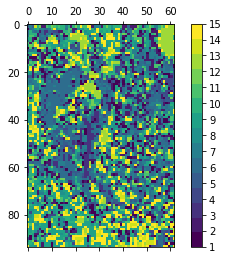

In [62]:
spec_sh.plot_segments()

In [63]:
spec_sh.filter_clusters(method='remove_singleton')
#spec_sh.filter_clusters(method='merge_background')
#spec_sh.filter_clusters(method='remove_islands')

array([[ 6,  3,  3, ...,  5,  1, 13],
       [ 5,  7,  5, ..., 13, 13, 13],
       [ 1,  6,  7, ..., 13, 13, 13],
       ...,
       [ 8, 10, 12, ...,  5,  5,  9],
       [10, 10,  9, ..., 15,  1,  1],
       [15,  9,  9, ...,  1,  9, 15]], dtype=int16)

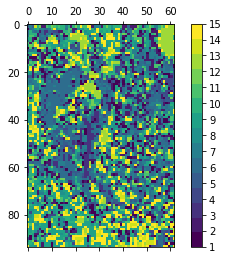

In [64]:
spec_sh.plot_segments()

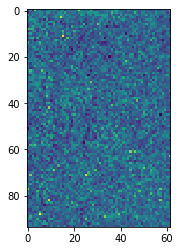

In [65]:
plt.imshow(sh_array[:,:,100])

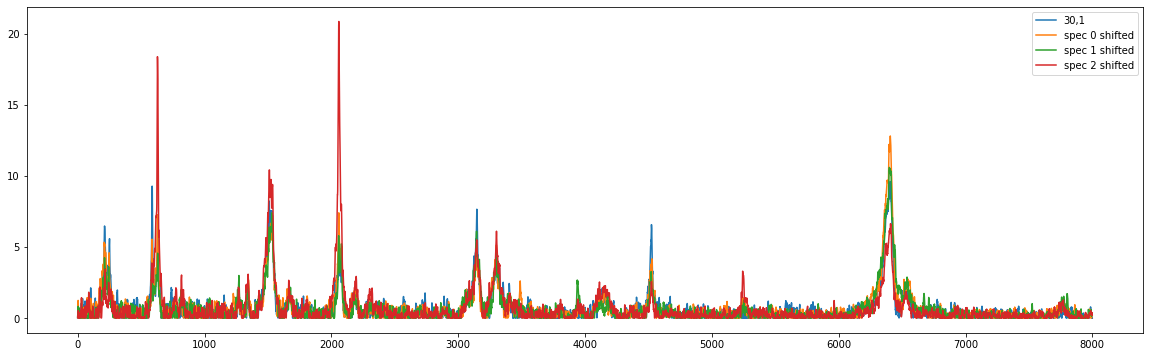

In [72]:
plt.figure(figsize=(20, 6))
mzvals = range(0,len(refSpec))
plt.plot(mzvals, refSpec, label="30,1")

for idx in i2sp:
    plt.plot(mzvals, i2sp[idx], label="spec {} shifted".format(idx))


plt.legend()

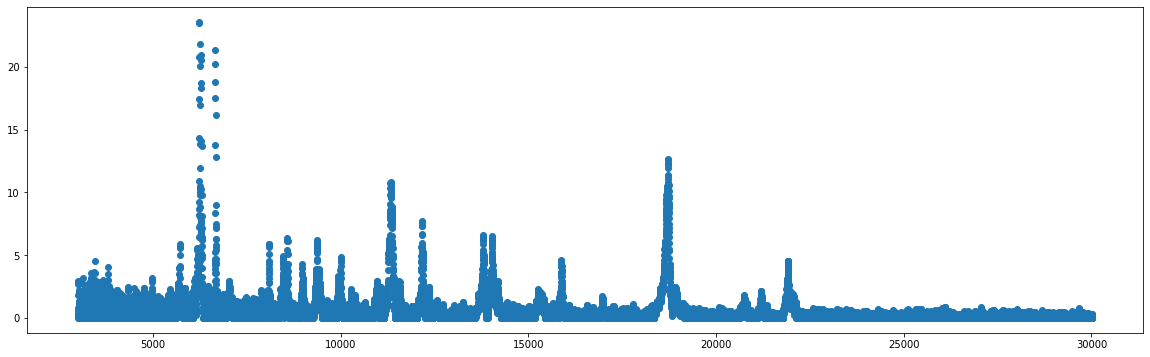

In [17]:
plt.figure(figsize=(20, 6))
plt.scatter(imze.mzValues, spec.region_array[40,40])

In [18]:
spec32, spec32Idx, origCoords = imze.get_pixel_spectrum(2, (3,2))

In [19]:
spec32Idx, origCoords

(25961, (693, 317, 1))

In [20]:
ridx = imze.get_region_index_array(2)

Found region 2 with shape (58, 102, 17900)
I0625 10:01:30.811232 139671011854144 segment.py:2206] Found region 2 with shape (58, 102, 17900)


In [21]:
ridx[0:5,0:5]

array([[27150., 26008., 25955., 26118., 26100.],
       [27151., 26003., 25959., 26119., 26101.],
       [27132., 26004., 25960., 26136., 26096.],
       [27133., 26005., 25961., 26153., 26097.],
       [27134., 26009., 25956., 26154., 26098.]], dtype=float32)

In [22]:
[x for x in imze.parser.coordinates if x[0] == 693 and x[1] == 317]

[(693, 317, 1)]

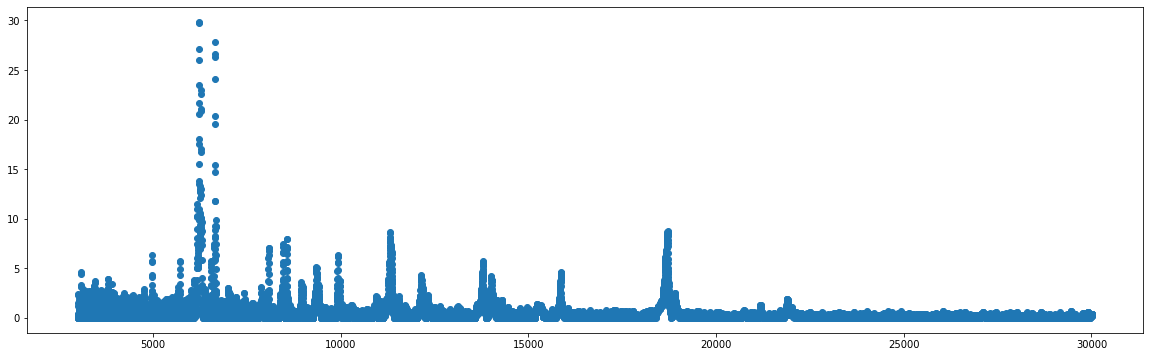

In [23]:
plt.figure(figsize=(20, 6))
plt.scatter(imze.mzValues, spec32)

In [24]:
spec.calculate_similarity(mode="spectra_log_dist")

(58, 102, 17900)


2020-06-25 10:01:49,191  SpectraRegion  INFO: Creating C++ obj
I0625 10:01:49.191900 139671011854144 segment.py:431] Creating C++ obj
2020-06-25 10:01:49,194  SpectraRegion  INFO: dimensions 17900
I0625 10:01:49.194013 139671011854144 segment.py:441] dimensions 17900
2020-06-25 10:01:49,195  SpectraRegion  INFO: input dimensions (58, 102, 17900)
I0625 10:01:49.195646 139671011854144 segment.py:442] input dimensions (58, 102, 17900)
2020-06-25 10:01:49,198  SpectraRegion  INFO: Switching to dot mode
I0625 10:01:49.198811 139671011854144 segment.py:445] Switching to dot mode
2020-06-25 10:01:49,200  SpectraRegion  INFO: Starting calc similarity c++
I0625 10:01:49.200610 139671011854144 segment.py:449] Starting calc similarity c++
2020-06-25 10:17:38,286  SpectraRegion  INFO: outclust dimensions (5916, 5916)
I0625 10:17:38.286796 139671011854144 segment.py:454] outclust dimensions (5916, 5916)
2020-06-25 10:17:38,336  SpectraRegion  INFO: Calculating spectra similarity
I0625 10:17:38.3362

(5916, 5916)


2020-06-25 10:17:39,137  SpectraRegion  INFO: Calculating spectra similarity done
I0625 10:17:39.137746 139671011854144 segment.py:487] Calculating spectra similarity done
2020-06-25 10:17:39,139  SpectraRegion  INFO: Calculating dist pixel map
I0625 10:17:39.139598 139671011854144 segment.py:494] Calculating dist pixel map
2020-06-25 10:22:24,813  SpectraRegion  INFO: Calculating dist pixel map done
I0625 10:22:24.813262 139671011854144 segment.py:504] Calculating dist pixel map done


array([[0.94999999, 0.90833975, 0.88168188, ..., 0.71656817, 0.73638482,
        0.7219659 ],
       [0.90833975, 0.94999999, 0.90985311, ..., 0.74330851, 0.76401638,
        0.74975468],
       [0.88168188, 0.90985311, 0.94999999, ..., 0.76771766, 0.79600748,
        0.78040253],
       ...,
       [0.71656817, 0.74330851, 0.76771766, ..., 0.94999999, 0.91538943,
        0.91374417],
       [0.73638482, 0.76401638, 0.79600748, ..., 0.91538943, 0.94999999,
        0.9210387 ],
       [0.7219659 , 0.74975468, 0.78040253, ..., 0.91374417, 0.9210387 ,
        0.94999999]])

2020-06-25 10:22:25,603  SpectraRegion  INFO: Calculating clusters
I0625 10:22:25.603322 139671011854144 segment.py:651] Calculating clusters
2020-06-25 10:22:27,848  SpectraRegion  INFO: Calculating clusters done
I0625 10:22:27.848916 139671011854144 segment.py:666] Calculating clusters done
2020-06-25 10:22:27,892  SpectraRegion  INFO: Calculating clusters saved
I0625 10:22:27.892347 139671011854144 segment.py:684] Calculating clusters saved


array([[4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 3, 3],
       ...,
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 2, 1, 2],
       [4, 4, 4, ..., 2, 1, 1]], dtype=int16)

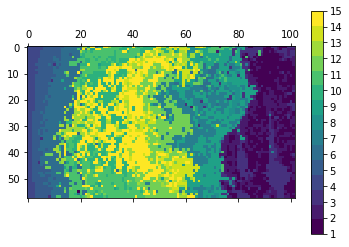